<ipython-input-1-94b3f442cee8>:19: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y_true) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-1-94b3f442cee8>:45: RuntimeWarning: invalid value encountered in subtract
  a -= learning_rate * grad_a


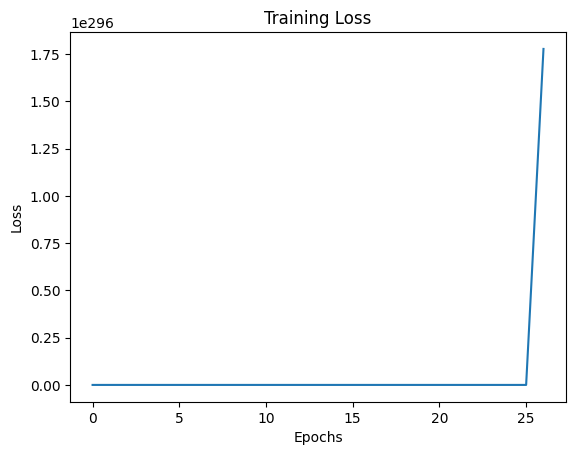

Test Loss: nan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/california_housing_train.csv')

y = data['median_house_value'].values
X = data.drop(columns=['median_house_value']).values

np.random.seed(42)
a = np.random.randn(X.shape[1])
b = np.random.randn()

def loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def y_prediction(a, X, b):
    return np.dot(X, a) + b

def gradient(a, X, b, y_true):
    y_pred = y_prediction(a, X, b)
    error = y_pred - y_true
    grad_a = (2 / len(y_true)) * np.dot(X.T, error)
    grad_b = (2 / len(y_true)) * np.sum(error)
    return grad_a, grad_b

def gradient_descent(X, y_true, learning_rate, epochs):
    a = np.random.randn(X.shape[1])
    b = np.random.randn()
    train_loss = []

    for epoch in range(epochs):
        y_pred = y_prediction(a, X, b)
        train_loss.append(loss(y_pred, y_true))

        grad_a, grad_b = gradient(a, X, b, y_true)

        a -= learning_rate * grad_a
        b -= learning_rate * grad_b

    return a, b, train_loss

learning_rate = 0.01
epochs = 1000

final_a, final_b, train_loss = gradient_descent(X, y, learning_rate, epochs)


plt.plot([i for i in range(epochs)], train_loss)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

test_data = pd.read_csv('/content/california_housing_test.csv')
y_test = test_data['median_house_value'].values
X_test = test_data.drop(columns=['median_house_value']).values

y_test_pred = y_prediction(final_a, X_test, final_b)

test_loss = loss(y_test_pred, y_test)
print(f"Test Loss: {test_loss}")
